# abc operator and its pseudospectrum

In [1]:
## Importation of basic rotutine
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import ticker, cm
from scipy import linalg as LA
from math import sin, cos, tanh, cosh, pi, log
import cmath
import import_ipynb

## Importation of Spectral tools
from PseudopectrumCalculator import *

importing Jupyter notebook from PseudopectrumCalculator.ipynb


In [2]:
#N=20
N=100
n=N+1
# Spectral Differentiation, identity and Zero matrices
xt = [D1_CL(N)[0]]
x = np.transpose(xt)
D1 = D1_CL(N)[1]
D2 = D2_CL(N)[1]
Id = np.eye(N+1)
Id_total = np.eye(2*(N+1))
Zero = np.zeros((N+1,N+1))

In [3]:
a, b, c = 1.0, 6.0, 1.0
L = a*(1-x**2)*D2 + (-4*a*x + b*(1-x**2))*D1 + (-2*a-2*b*x+c*(1-x**2))*Id 
# L = a*D2 +  b*D1 + c*Id 
Ladj = a*(1-x**2)*D2 + (-4*a*x* - b*(1-x**2))*D1 + (-2*a+2*b*x+c*(1-x**2))*Id
# Ladj = a*D2 -  b*D1 + c*Id 
B = (1-x**2)*Id
#B = Id

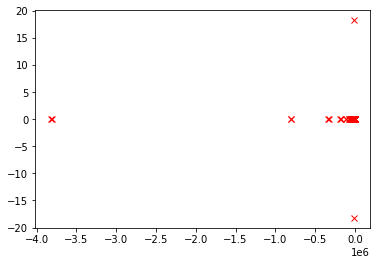

In [4]:
S=SpectrumAlt(L,B);
fig_spectrum_abc = plt.figure()
spec_abc = fig_spectrum_abc.add_subplot(111)
spec_abc.plot(S.real, S.imag,'rx')

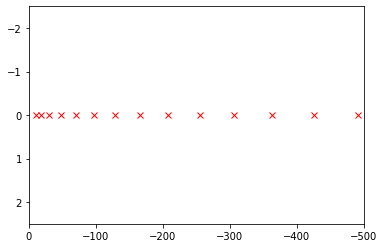

In [5]:
#### Plot for paper ####
S=SpectrumAlt(L,B);
fig_spectrum_abc = plt.figure()
spec_abc = fig_spectrum_abc.add_subplot(111)
spec_abc.set_xlim(0,-500)
spec_abc.set_ylim(2.5,-2.5)
spec_abc.plot(S.real, S.imag,'rx')
fig_spectrum_abc.savefig("Figures_abc/spectrumQ.pdf")

In [6]:
xmin, xmax ,ymin,ymax, Nxgrid, Nygrid = 20., -500., -200., 200., 75, 75
heights = [1e-15,1e-14,1e-13,1e-12,1e-11,1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1e0, 1e1, 1e2]
fl = "c"

PseudopectrumCalculator.ipynb:50: UserWarning: The following kwargs were not used by contour: 'linewidth'
  "def Cheb_spectral_interpol(coeffs,x) :\n",
PseudopectrumCalculator.ipynb:73: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  "\n",



 N =
 49.5


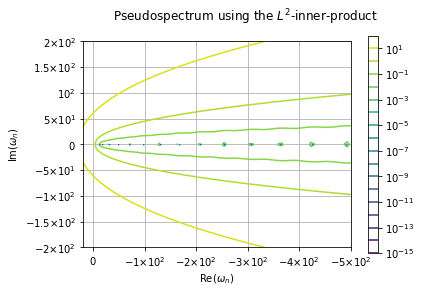

In [7]:
Pseudospectrum_standard(L,B,xmin,xmax,ymin,ymax,Nxgrid,Nygrid,heights,fl)

PseudopectrumCalculator.ipynb:50: UserWarning: The following kwargs were not used by contour: 'linewidth'
  "def Cheb_spectral_interpol(coeffs,x) :\n",
PseudopectrumCalculator.ipynb:73: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  "\n",



 N =
 49.5


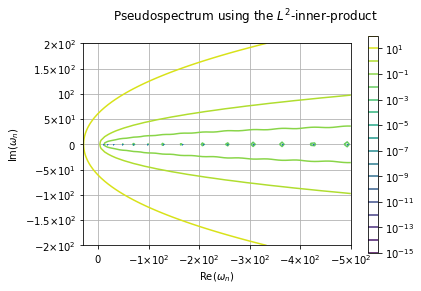

In [8]:
#### plot for paper A ####
xmin, xmax ,ymin,ymax, Nxgrid, Nygrid = 30., -500., -200., 200., 75, 75
heights = [1e-15,1e-14,1e-13,1e-12,1e-11,1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1e0, 1e1, 1e2]
fl = "c"
Pseudospectrum_standard(L,B,xmin,xmax,ymin,ymax,Nxgrid,Nygrid,heights,fl)

In [9]:
########################################################################################################
# Sanity checks for the implementation of the "integration" matrix CNmu and the "interpolation" Matrix I
########################################################################################################

In [10]:
Identitytest = np.ones(10)  #np.array([3., 21., 11., 9.]) #np.ones(4) #CL_grid(3) 
#len(mutest)
Identitytest

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [11]:
TestC=CNmuMatrix((Identitytest))

In [12]:
def fTestFunction(x):
    fTestFunctionReturn =  x**4 #np.cos(x**2) #x**4  #np.log(x**2) 
    return fTestFunctionReturn
def gTestFunction(x):
    gTestFunctionReturn = x**2
    return gTestFunctionReturn

In [13]:
# the f and g test functions used here are polynomials of degree 4 and 2. 
# We use a low resoltion to test our infrastructure 
# ---to have a non-vanishing error to test the quality of the interpolation function later
Identitytest = np.ones(5) 
TestC=CNmuMatrix((Identitytest))

In [14]:
import scipy.integrate as integrate

In [15]:
Integral_Value, Integration_Error_scipy = integrate.quad(lambda x: fTestFunction(x)*gTestFunction(x), -1, 1)
Integral_Value, Integration_Error_scipy

(0.2857142857142857, 3.172065784643304e-15)

In [16]:
# We turn our continous functions into lobatto-grid-functions.
fTestFunctionCollocationPoints=FunctionAtCollocationPoints(fTestFunction,len(Identitytest))
gTestFunctionCollocationPoints=FunctionAtCollocationPoints(gTestFunction,len(Identitytest))

In [17]:
Cg=np.dot(TestC,gTestFunctionCollocationPoints)
fCg=np.dot(fTestFunctionCollocationPoints.transpose(),Cg)
fCg

0.2666666666666667

In [18]:
Relative_error= abs(Integral_Value-fCg)
Relative_error

0.01904761904761898

In [19]:
### Sanity check for the interpolation matrix ###
InterpolationMatrixI(3,3)
#This should be the identity

array([[ 1.00000000e+00,  5.55111512e-17,  0.00000000e+00],
       [ 2.77555756e-17,  1.00000000e+00, -5.55111512e-17],
       [ 0.00000000e+00, -1.11022302e-16,  1.00000000e+00]])

In [20]:
#### Other sanity check for the interpolation matrix ####
Identitytest_high = np.ones(2*len(Identitytest)) 
TestC_high=CNmuMatrix((Identitytest_high))
InterpolatedTestC=Matrix_Interpolated(TestC_high)

In [21]:
Cg_better=np.dot(InterpolatedTestC,gTestFunctionCollocationPoints)
fCg_better=np.dot(fTestFunctionCollocationPoints.transpose(),Cg_better)
fCg_better

0.2857142857142857

In [22]:
### We verify that the integration improve when using the interpolated version of the "integration" matrix ###
Relative_error_better= abs(Integral_Value-fCg_better)
Relative_error_better

0.0

In [23]:
#####################################################################
####### Sanity check for the Pseudospectrum_gram_norm function ######
#####################################################################

In [24]:
#### test for Pseudospectrum_gram_norm using the weight function = identity #########

In [25]:
N = 100
n=N+1
# Spectral Differentiation, identity and Zero matrices
xt = [D1_CL(N)[0]]
x = np.transpose(xt)
D1 = D1_CL(N)[1]
D2 = D2_CL(N)[1]
Id = np.eye(N+1)
Id_total = np.eye(2*(N+1))
Zero = np.zeros((N+1,N+1))

In [26]:
a, b, c = 1.0, 6.0, 1.0
L = a*(1-x**2)*D2 + (-4*a*x + b*(1-x**2))*D1 + (-2*a-2*b*x+c*(1-x**2))*Id 
Ladj = a*(1-x**2)*D2 + (-4*a*x* - b*(1-x**2))*D1 + (-2*a+2*b*x+c*(1-x**2))*Id
B = (1-x**2)*Id

In [27]:
### without interpolation ####
w_Identity_no_interpolation= np.ones(n)
Gram_Matrix_Id_no_interpolation=GramMatrix_abc_not_interpolated(w_Identity_no_interpolation)

PseudopectrumCalculator.ipynb:57: UserWarning: The following kwargs were not used by contour: 'linewidth'
  "    #EG: this N does nothing in this function.  it is just a bookkeeping device, right?\n",
PseudopectrumCalculator.ipynb:79: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  "\n",



 N =
 49.5


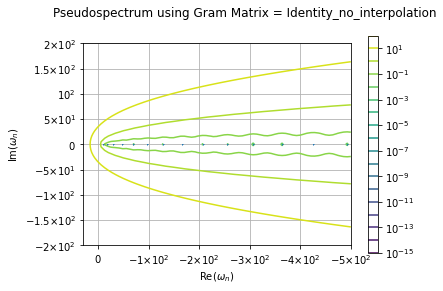

In [28]:
Pseudospectrum_gram_norm(L,B,xmin,xmax,ymin,ymax,Nxgrid,Nygrid,heights,fl,Gram_Matrix_Id_no_interpolation, "Identity_no_interpolation")

In [29]:
### with interpolation ####
w_Identity= np.ones(2*n)
Gram_Matrix_Id=GramMatrix_abc(w_Identity)

PseudopectrumCalculator.ipynb:57: UserWarning: The following kwargs were not used by contour: 'linewidth'
  "    #EG: this N does nothing in this function.  it is just a bookkeeping device, right?\n",
PseudopectrumCalculator.ipynb:79: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  "\n",



 N =
 49.5


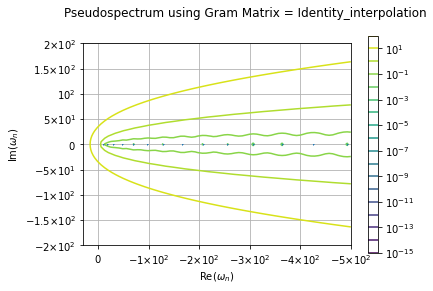

In [30]:
Pseudospectrum_gram_norm(L,B,xmin,xmax,ymin,ymax,Nxgrid,Nygrid,heights,fl,Gram_Matrix_Id, "Identity_interpolation")

### Sturm-Liouville rescaled abc

Given an operator 
$$L = a(x)\frac{d^2}{dx^2} + b(x)\frac{d}{dx} + c(x)$$

Notice that the coefficients are not necessarily constant. The Sturm-Liouville integrating factor 
$w(x)$ is given by

$$ w(x)= \frac{1}{a} exp \int \frac{b}{a} dx$$

For our particular case with
$$ a(x) = a_0 (1 - x^2) , \qquad b(x) = - 4 a_0 x + b_0(1-b_0 x^2) , \qquad c(x) = (-2a_0-2b_0x+c_0(1-x^2)) $$
we have that

$$ \int \frac{b(x)}{a(x)} dx =  \frac{b_0 x}{a_0} + 2\ln(x^2-1)$$ hence
$$ w(x) =\frac{(1-x^2)exp\big(\frac{b_0 x}{a_0}\big)}{a_0}$$


In [31]:
def wFunction(x):
    wFunctionReturn = (1-x**2)*np.exp((b*x)/a)
    return wFunctionReturn

In [32]:
N = 100
n=N+1
# Spectral Differentiation, identity and Zero matrices
xt = [D1_CL(N)[0]]
x = np.transpose(xt)
D1 = D1_CL(N)[1]
D2 = D2_CL(N)[1]
Id = np.eye(N+1)
Id_total = np.eye(2*(N+1))
Zero = np.zeros((N+1,N+1))
a, b, c = 1.0, 6.0, 1.0
L = a*(1-x**2)*D2 + (-4*a*x + b*(1-x**2))*D1 + (-2*a-2*b*x+c*(1-x**2))*Id 
Ladj = a*(1-x**2)*D2 + (-4*a*x* - b*(1-x**2))*D1 + (-2*a+2*b*x+c*(1-x**2))*Id
B = (1-x**2)*Id

In [33]:
w_abc_test = FunctionAtCollocationPoints(wFunction,2*n)
Gram_Matrix_abc_test=GramMatrix_abc(w_abc_test)

In [34]:
xmin, xmax ,ymin,ymax, Nxgrid, Nygrid = 20., -500., -200., 200., 75, 75
#xmin, xmax ,ymin,ymax, Nxgrid, Nygrid = -350., 10., -200., 200., 75, 75
exponents = np.linspace(-2,1.5,30)
heights = 10**exponents
print(heights)
fl = "c"

[1.00000000e-02 1.32035178e-02 1.74332882e-02 2.30180731e-02
 3.03919538e-02 4.01280703e-02 5.29831691e-02 6.99564216e-02
 9.23670857e-02 1.21957046e-01 1.61026203e-01 2.12611233e-01
 2.80721620e-01 3.70651291e-01 4.89390092e-01 6.46167079e-01
 8.53167852e-01 1.12648169e+00 1.48735211e+00 1.96382800e+00
 2.59294380e+00 3.42359796e+00 4.52035366e+00 5.96845700e+00
 7.88046282e+00 1.04049831e+01 1.37382380e+01 1.81393069e+01
 2.39502662e+01 3.16227766e+01]


PseudopectrumCalculator.ipynb:57: UserWarning: The following kwargs were not used by contour: 'linewidth'
  "    #EG: this N does nothing in this function.  it is just a bookkeeping device, right?\n",
PseudopectrumCalculator.ipynb:79: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  "\n",



 N =
 49.5


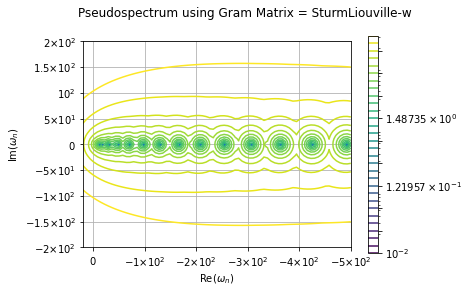

In [35]:
Pseudospectrum_gram_norm(L,B,xmin,xmax,ymin,ymax,Nxgrid,Nygrid,heights,fl,Gram_Matrix_abc_test, "SturmLiouville-w")

[1.00000000e-02 1.32035178e-02 1.74332882e-02 2.30180731e-02
 3.03919538e-02 4.01280703e-02 5.29831691e-02 6.99564216e-02
 9.23670857e-02 1.21957046e-01 1.61026203e-01 2.12611233e-01
 2.80721620e-01 3.70651291e-01 4.89390092e-01 6.46167079e-01
 8.53167852e-01 1.12648169e+00 1.48735211e+00 1.96382800e+00
 2.59294380e+00 3.42359796e+00 4.52035366e+00 5.96845700e+00
 7.88046282e+00 1.04049831e+01 1.37382380e+01 1.81393069e+01
 2.39502662e+01 3.16227766e+01]


PseudopectrumCalculator.ipynb:57: UserWarning: The following kwargs were not used by contour: 'linewidth'
  "    #EG: this N does nothing in this function.  it is just a bookkeeping device, right?\n",
PseudopectrumCalculator.ipynb:79: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  "\n",



 N =
 49.5


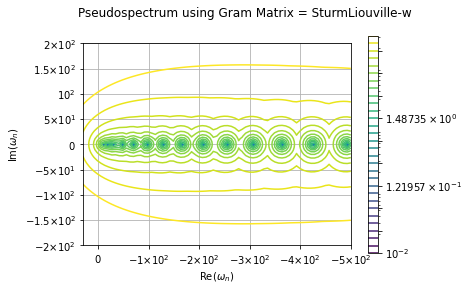

In [36]:
#### plot for paper B ####
xmin, xmax ,ymin,ymax, Nxgrid, Nygrid = 30., -500., -200., 200., 75, 75
exponents = np.linspace(-2,1.5,30)
heights = 10**exponents
print(heights)
fl = "c"
Pseudospectrum_gram_norm(L,B,xmin,xmax,ymin,ymax,Nxgrid,Nygrid,heights,fl,Gram_Matrix_abc_test, "SturmLiouville-w")